In [165]:
import glob
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import pandas as pd

In [166]:
img_path = "C:/Users/line/Desktop/stitch and perspective/imgs"
save_img_path = "../imgs/perspective/"

In [167]:
df = pd.read_csv("2023_11_10.csv")

In [168]:
df_c = df.copy()

In [169]:
df['x'] = df['x'] * 1000
df['y'] = df['y'] * 1000

In [170]:
df['x'] = df['x'].astype(int)
df['y'] = df['y'].astype(int)

In [171]:
df

,n,x,y,r
0,1,0,0,0.0
1,2,0,900,0.0
2,3,0,1800,0.0
3,4,0,2700,0.0
4,5,0,3600,0.0
...,...,...,...,...
117,118,9355,2846,180.0
118,119,9355,1946,180.0
119,120,9805,1046,180.0
120,121,9805,146,180.0


In [172]:
for i in range(0, df.shape[0]):
    row = df.iloc[i]
    idx = df.index[i]
    print(f'{i}')
    print(' x: {}, y: {}, r: {}'.format(row['x'],row['y'], row['r']))

0
 x: 0.0, y: 0.0, r: 0.0
1
 x: 0.0, y: 900.0, r: 0.0
2
 x: 0.0, y: 1800.0, r: 0.0
3
 x: 0.0, y: 2700.0, r: 0.0
4
 x: 0.0, y: 3600.0, r: 0.0
5
 x: 0.0, y: 4500.0, r: 0.0
6
 x: 0.0, y: 5400.0, r: 0.0
7
 x: 0.0, y: 6300.0, r: 0.0
8
 x: 0.0, y: 7200.0, r: 0.0
9
 x: 0.0, y: 8100.0, r: 0.0
10
 x: 0.0, y: 9000.0, r: 0.0
11
 x: 0.0, y: 9900.0, r: 0.0
12
 x: 0.0, y: 10800.0, r: 0.0
13
 x: 0.0, y: 11700.0, r: 0.0
14
 x: 0.0, y: 12150.0, r: 0.0
15
 x: 900.0, y: 12150.0, r: 0.0
16
 x: 900.0, y: 11700.0, r: 0.0
17
 x: 900.0, y: 10800.0, r: 0.0
18
 x: 900.0, y: 9900.0, r: 0.0
19
 x: 900.0, y: 9000.0, r: 0.0
20
 x: 900.0, y: 8100.0, r: 0.0
21
 x: 900.0, y: 7200.0, r: 0.0
22
 x: 900.0, y: 6300.0, r: 0.0
23
 x: 900.0, y: 5400.0, r: 0.0
24
 x: 900.0, y: 4500.0, r: 0.0
25
 x: 900.0, y: 3600.0, r: 0.0
26
 x: 900.0, y: 2700.0, r: 0.0
27
 x: 900.0, y: 1800.0, r: 0.0
28
 x: 900.0, y: 900.0, r: 0.0
29
 x: 900.0, y: 0.0, r: 0.0
30
 x: 1800.0, y: 0.0, r: 0.0
31
 x: 1800.0, y: 900.0, r: 0.0
32
 x: 1800.0, y: 18

In [173]:
img_list = [cv.resize(cv.imread(file),(1080,1440)) for file in glob.glob(f'{img_path}/*.jpg')]

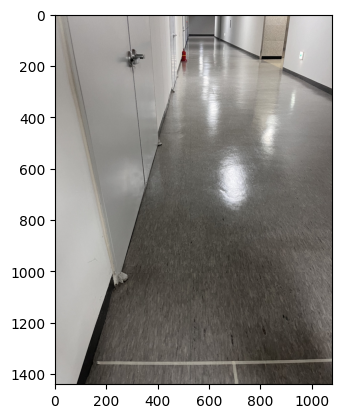

In [174]:
plt.imshow(cv.cvtColor(img_list[0], cv.COLOR_BGR2RGB))

In [176]:
input_row, input_cols = map(int, input("enter canvas size in here:").split())

In [177]:
canvas = np.zeros((input_row,input_cols,3 ),dtype=np.uint8) + 255

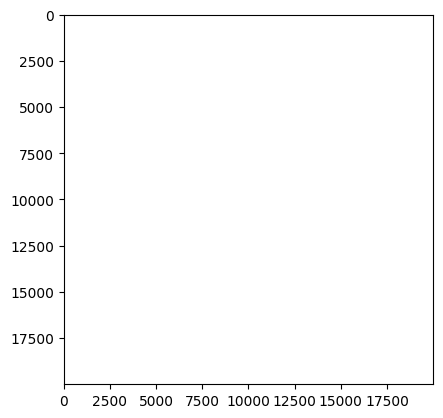

In [178]:
plt.imshow(canvas)

In [179]:
tl = (240,585)    #좌상
tr = (810,585)    #우상
br = (1050,1010)  #우하
bl = (40,1010)  #좌하
val = 1000

In [180]:
pts1 = np.float32([tl,tr,br,bl])
pts2 = np.float32([[0,0],[val-1,0],[val-1,val-1],[0,val-1]])

In [181]:
matrix = cv.getPerspectiveTransform(pts1,pts2)

In [208]:
crop_list = []

In [198]:
crop = cv.warpPerspective(img_list[1],matrix,(val,val))

In [209]:
for i in range(len(img_list)):
    warping = cv.warpPerspective(img_list[i], matrix,(val,val))
    crop_list.append(warping)

In [211]:
crop_list[1]

array([[[195, 200, 199],
        [194, 199, 198],
        [194, 199, 198],
        ...,
        [ 96, 103, 106],
        [107, 114, 117],
        [122, 129, 132]],

       [[194, 199, 199],
        [194, 199, 199],
        [194, 199, 199],
        ...,
        [ 98, 105, 108],
        [112, 119, 122],
        [121, 128, 131]],

       [[194, 199, 199],
        [194, 199, 199],
        [194, 199, 199],
        ...,
        [103, 110, 113],
        [116, 123, 126],
        [119, 126, 129]],

       ...,

       [[206, 208, 208],
        [205, 206, 206],
        [206, 207, 207],
        ...,
        [103, 109, 114],
        [101, 108, 113],
        [102, 108, 113]],

       [[206, 209, 209],
        [204, 206, 206],
        [205, 206, 206],
        ...,
        [ 99, 106, 111],
        [100, 106, 111],
        [111, 117, 122]],

       [[200, 202, 202],
        [205, 207, 207],
        [203, 205, 205],
        ...,
        [ 93,  99, 104],
        [100, 106, 111],
        [114, 120, 125]]

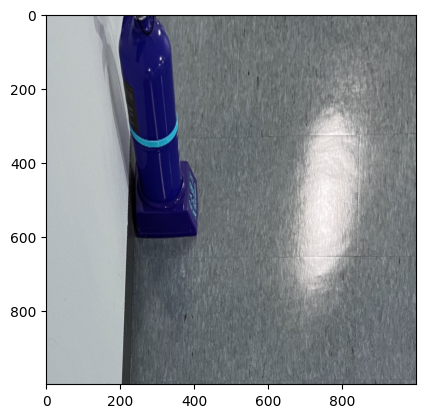

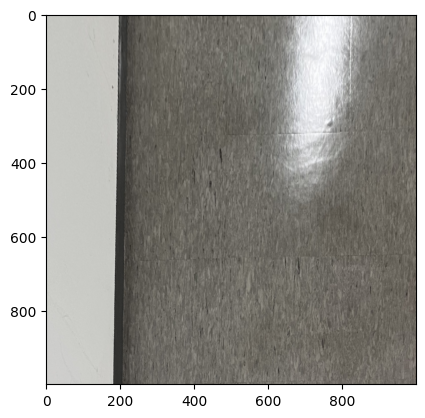

In [205]:
plt.imshow(cv.cvtColor(crop, cv.COLOR_BGR2RGB))

In [142]:
height,width,channels = crop.shape

In [143]:
x_offset, y_offset = df['x'][0], df['y'][0]

In [144]:
canvas[y_offset:y_offset+height, x_offset:x_offset+width] = crop

In [217]:
for i in range(len(df)):
    y_offset = df['y'][i] 
    x_offset = df['x'][i] 
    
    height, width, channels= crop.shape    
    canvas[y_offset:y_offset + height, x_offset:x_offset+width] = crop_list[i]

IndexError: list index out of range

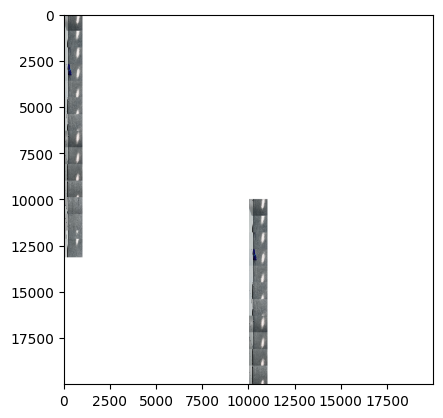

In [218]:
plt.imshow(canvas)